In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

%matplotlib inline

In [46]:
data = pd.read_csv('/Users/xiaoy/Desktop/DS_1007/Project/ROI_processed.csv')

data = data.drop(columns=['Unnamed: 0'])
data.describe()

,ADM_RATE,SAT_AVG,LATITUDE,LONGITUDE,REGION,LOCALE,SCH_DEG,MAIN,NUMBRANCH,HIGHDEG,...,UG_BLACKNH,UG_API,UG_AIANOLD,UG_HISPOLD,MEDIAN_HH_INC,UNEMP_RATE,UGDS_MEN,UGDS_WOMEN,COMPL_RATE,ROI
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,...,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,0.652137,1060.199213,38.557691,-88.286036,4.114173,20.583465,2.965354,0.965354,1.519685,3.808661,...,0.115605,0.036653,0.008784,0.048974,63587.498961,3.411079,0.433302,0.566698,0.393478,1.221019
std,0.195154,136.180247,4.688927,13.864629,1.938463,9.581826,0.203352,0.182953,2.869503,0.444301,...,0.189629,0.059953,0.035267,0.082917,10767.168701,0.706810,0.124877,0.124877,0.206939,0.534795
min,0.048100,712.000000,18.344193,-157.926586,0.000000,11.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,31403.340000,2.120000,0.000000,0.000000,0.000000,0.409750
25%,0.539050,970.250000,35.144908,-94.095774,2.000000,12.000000,3.000000,1.000000,1.000000,4.000000,...,0.028325,0.007600,0.002000,0.010600,56319.700000,2.950000,0.385725,0.507800,0.230600,0.821142
50%,0.669300,1040.000000,39.729618,-84.970306,4.000000,21.000000,3.000000,1.000000,1.000000,4.000000,...,0.055300,0.015900,0.003700,0.021150,63344.330000,3.260000,0.437250,0.562750,0.367100,1.042484
75%,0.786300,1120.750000,41.740329,-78.638033,5.000000,32.000000,3.000000,1.000000,1.000000,4.000000,...,0.119200,0.036900,0.007000,0.050075,71568.645000,3.680000,0.492200,0.614275,0.533675,1.580413
max,1.000000,1555.000000,64.857560,-64.972866,9.000000,43.000000,3.000000,1.000000,23.000000,4.000000,...,1.000000,0.726600,1.000000,0.929700,95275.150000,7.550000,1.000000,1.000000,1.000000,7.639133


In [7]:
state_dict = {
                1: 'Alabama',
                2: 'Alaska',
                4: 'Arizona',
                5: 'Arkansas',
                6: 'California',
                8: 'Colorado',
                9: 'Connecticut',
                10: 'Delaware',
                11: 'District of Columbia',
                12: 'Florida',
                13: 'Georgia',
                15: 'Hawaii',
                16: 'Idaho',
                17: 'Illinois',
                18: 'Indiana',
                19: 'Iowa',
                20: 'Kansas',
                21: 'Kentucky',
                22: 'Louisiana',
                23: 'Maine',
                24: 'Maryland',
                25: 'Massachusetts',
                26: 'Michigan',
                27: 'Minnesota',
                28: 'Mississippi',
                29: 'Missouri',
                30: 'Montana',
                31: 'Nebraska',
                32: 'Nevada',
                33: 'New Hampshire',
                34: 'New Jersey',
                35: 'New Mexico',
                36: 'New York',
                37: 'North Carolina',
                38: 'North Dakota',
                39: 'Ohio',
                40: 'Oklahoma',
                41: 'Oregon',
                42: 'Pennsylvania',
                44: 'Rhode Island',
                45: 'South Carolina',
                46: 'South Dakota',
                47: 'Tennessee',
                48: 'Texas',
                49: 'Utah',
                50: 'Vermont',
                51: 'Virginia',
                53: 'Washington',
                54: 'West Virginia',
                55: 'Wisconsin',
                56: 'Wyoming',
                60: 'American Samoa',
                64: 'Federated States of Micronesia',
                66: 'Guam',
                69: 'Northern Mariana Islands',
                70: 'Palau',
                72: 'Puerto Rico',
                78: 'Virgin Islands'
            }

In [8]:
state_data = data.replace({"ST_FIPS": state_dict})

In [9]:
by_state_data = state_data.groupby('ST_FIPS').mean()

In [10]:
by_state_data

,ADM_RATE,SAT_AVG,LATITUDE,LONGITUDE,REGION,LOCALE,SCH_DEG,MAIN,NUMBRANCH,HIGHDEG,...,UG_BLACKNH,UG_API,UG_AIANOLD,UG_HISPOLD,MEDIAN_HH_INC,UNEMP_RATE,UGDS_MEN,UGDS_WOMEN,COMPL_RATE,ROI
ST_FIPS,,,,,,,,,,,,,,,,,,,,,
Alabama,0.634408,1030.560000,32.903904,-86.875708,5.000000,19.800000,2.960000,1.000000,1.120000,3.720000,...,0.319232,0.014260,0.006272,0.011836,53903.116000,3.745600,0.426416,0.573584,0.255780,1.203564
Alaska,0.734700,1060.000000,64.857560,-147.823146,8.000000,23.000000,3.000000,1.000000,1.000000,4.000000,...,0.032400,0.024800,0.171100,0.025500,65084.810000,6.560000,0.454600,0.545400,0.152500,1.838984
Arizona,0.734633,1082.833333,33.654226,-112.058083,6.000000,11.500000,3.000000,0.500000,4.333333,3.833333,...,0.039500,0.028650,0.025167,0.106950,64495.936667,3.438333,0.505867,0.494133,0.394567,1.380399
Arkansas,0.717971,1058.882353,35.081816,-92.550828,5.000000,23.705882,2.823529,1.000000,1.058824,3.411765,...,0.146300,0.009953,0.008812,0.011129,50412.387059,3.601765,0.435418,0.564582,0.315282,1.286701
California,0.539560,1114.228571,35.395195,-119.413849,8.000000,17.085714,3.000000,1.000000,1.085714,3.914286,...,0.052609,0.148546,0.008811,0.145396,72945.112286,3.896000,0.419157,0.580843,0.494933,1.103377
Colorado,0.767293,1082.928571,39.234457,-105.621613,7.000000,16.785714,3.000000,1.000000,1.000000,4.000000,...,0.028579,0.036650,0.020786,0.098357,68776.450000,3.055714,0.496786,0.503214,0.308986,1.504032
Connecticut,0.601514,1034.642857,41.447532,-72.879324,1.000000,16.785714,2.928571,0.785714,1.857143,3.928571,...,0.087364,0.044143,0.004800,0.058207,76633.885000,3.385714,0.409857,0.590143,0.436641,1.591120
Delaware,0.568733,966.000000,39.343311,-75.607023,2.000000,15.666667,3.000000,1.000000,1.000000,4.000000,...,0.346100,0.014467,0.002267,0.020800,71786.253333,3.650000,0.409200,0.590800,0.368567,1.334652
District of Columbia,0.358220,1190.800000,38.914761,-77.044668,2.000000,11.000000,3.000000,1.000000,1.000000,4.000000,...,0.231400,0.056100,0.003600,0.042960,76389.750000,3.396000,0.410600,0.589400,0.602780,0.800009


In [11]:
by_state_data.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='ST_FIPS')

In [94]:
abbr_state_dict = {
        'Alaska': 'AK',
        'Alabama': 'AL',
        'Arkansas': 'AR',
        'American Samoa': 'AS',
        'Arizona': 'AZ',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'District of Columbia': 'DC',
        'Delaware': 'DE',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Guam': 'GU',
        'Hawaii': 'HI',
        'Iowa': 'IA',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Massachusetts': 'MA',
        'Maryland': 'MD',
        'Maine': 'ME',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Missouri': 'MO',
        'Northern Mariana Islands': 'MP',
        'Mississippi': 'MS',
        'Montana': 'MT',
        'National': 'NA',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Nebraska': 'NE',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'Nevada': 'NV',
        'New York': 'NY',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Puerto Rico': 'PR',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Virginia': 'VA',
        'Virgin Islands': 'VI',
        'Vermont': 'VT',
        'Washington': 'WA',
        'Wisconsin': 'WI',
        'West Virginia': 'WV',
        'Wyoming': 'WY'
}

In [ ]:
roi_max = max(by_state_data['ROI'])
roi_min = min(by_state_data['ROI'])
roi_range = roi_max - roi_min

In [ ]:
def seg_map_ak(seg):
    new_seg = []
    for item in seg:
        new_seg.append((0.25*item[0] + 1450000, 0.25*item[1] - 900000))
    return new_seg
def seg_map_hi(seg):
    new_seg = []
    for item in seg:
        new_seg.append((0.5*item[0] + 2700000, 0.5*item[1] - 1200000))
    return new_seg

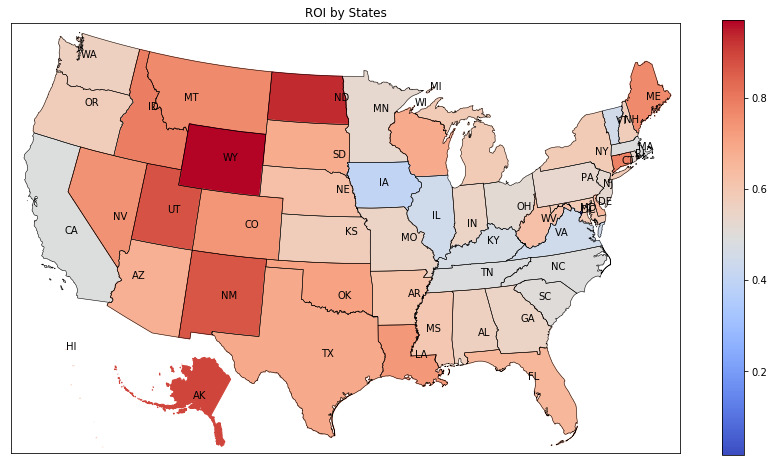

In [200]:
fig, ax = plt.subplots(figsize=(15,8))
colors=[]
patches = []
statenames=[]

mp = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
shp_info = mp.readshapefile('st99_d00', name='states', drawbounds=True)
cmap = plt.get_cmap('coolwarm')

for shape_dict in mp.states_info:
    statenames.append(shape_dict['NAME'])
    
ax = plt.gca()
printed = []
for nshape, seg in enumerate(mp.states):
    statename = statenames[nshape]
    if statename not in ['Puerto Rico']:
        x, y = np.array(seg).mean(axis=0)
        if statenames[nshape] == 'Alaska':
        # Alaska is too big. Scale it down to 35% first, then transate it. 
            seg = seg_map_ak(seg)
        if statenames[nshape] == 'Hawaii':
            seg = seg_map_hi(seg)
            
        roi = by_state_data.loc[statename, 'ROI']
        color = cmap(np.sqrt((roi-roi_min)/(roi_range)))[:3]
        colors.append(color)
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        patches.append(poly)
        ax.add_patch(poly)
        
        abbrname = abbr_state_dict[statename]
        if abbrname in printed: 
            continue
        printed.append(abbrname)
        x, y = np.array(seg).mean(axis=0)
        plt.text(x, y, abbrname)
        
p = PatchCollection(patches, cmap=cmap)
p.set_array(np.array(colors))
cb = fig.colorbar(p)
plt.title("ROI by States")
plt.show()

In [225]:
by_region_data = state_data.groupby('REGION').mean()

In [226]:
roi_max = max(by_region_data['ROI'])
roi_min = min(by_region_data['ROI'])
roi_range = roi_max - roi_min

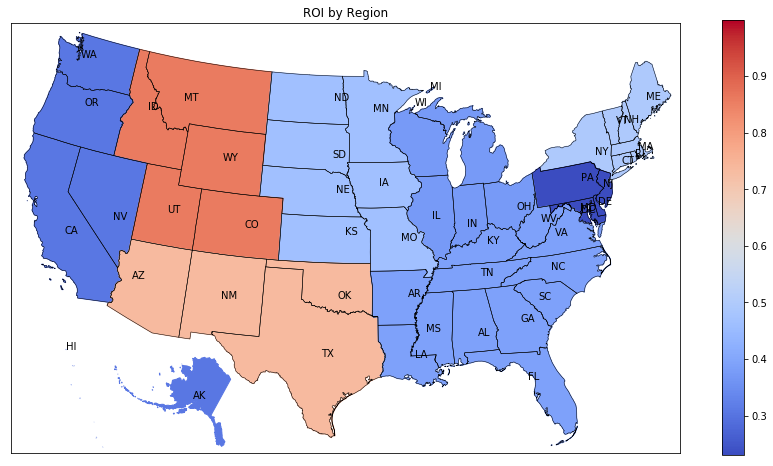

In [227]:
fig, ax = plt.subplots(figsize=(15,8))
colors=[]
patches = []
statenames=[]

mp = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
shp_info = mp.readshapefile('st99_d00', name='states', drawbounds=True)
cmap = plt.get_cmap('coolwarm')

for shape_dict in mp.states_info:
    statenames.append(shape_dict['NAME'])
    
ax = plt.gca()
printed = []
for nshape, seg in enumerate(mp.states):
    statename = statenames[nshape]
    if statename not in ['Puerto Rico']:
        x, y = np.array(seg).mean(axis=0)
        if statenames[nshape] == 'Alaska':
        # Alaska is too big. Scale it down to 35% first, then transate it. 
            seg = seg_map_ak(seg)
        if statenames[nshape] == 'Hawaii':
            seg = seg_map_hi(seg)
            
        region = int(by_state_data.loc[statename, 'REGION'])
        roi = by_region_data.loc[region, 'ROI']
        color = cmap(np.sqrt((roi-roi_min)*10/(roi_range)))[:3]
        colors.append(color)
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        patches.append(poly)
        ax.add_patch(poly)
        
        abbrname = abbr_state_dict[statename]
        if abbrname in printed: 
            continue
        printed.append(abbrname)
        x, y = np.array(seg).mean(axis=0)
        plt.text(x, y, abbrname)
        
p = PatchCollection(patches, cmap=cmap)
p.set_array(np.array(colors))
cb = fig.colorbar(p)
plt.title("ROI by Region")
plt.show()